In [7]:
import os
import cv2
import numpy as np
import pandas as pd

In [8]:
video = cv2.VideoCapture('PPGsample1.mp4')
ret, frame = video.read()
width = int(video.get(3))
height = int(video.get(4))
fps = video.get(5)
length = int(video.get(7))/fps
print 'Video Width: ', width, 'px'
print 'Video Height: ', height, 'px'
print 'Video FPS: ', fps, 'frames per second'
print 'Video Length: ', length, 's'

Video Width:  1920 px
Video Height:  1080 px
Video FPS:  30.323427803 frames per second
Video Length:  30.1746888889 s


In [9]:
def readFrame():
    hasFrame, frame = video.read();
    if not hasFrame:
        return False, 0, 0, 0
    totalRed = 0
    totalGreen = 0
    totalBlue = 0
    for col in range(0, width):
        # adds up all of the color values for each pixel in the frame
        # returns average value per pixel
        for row in range(0, height):
            totalRed += frame[row][col][2]
            totalGreen += frame[row][col][1]
            totalBlue += frame[row][col][0]
    return True, totalRed/1.0/width/height, totalGreen/1.0/width/height, totalBlue/1.0/width/height
    

In [6]:
redValues = []
greenValues = []
blueValues= []

while True:
    hasFrame, r, g, b = readFrame()
    if not hasFrame:
        break
    else:
        redValues.append(r)
        greenValues.append(g)
        blueValues.append(b)
        print(r, g, b)

NameError: name 'readFrame' is not defined

In [9]:
#takes a long time to process video, so save to file
def writeToFile(fileName, rL, gL, bL):
    colors = [rL, gL, bL]
    np.savetxt(fileName, colors)
writeToFile('color-values-PPG1.txt', redValues, greenValues, blueValues)

In [11]:
#get video from file, which is much faster than processing again
def readFromFile(fileName):
    l =np.loadtxt(fileName)
    return l[0], l[1], l[2]
redValues, greenValues, blueValues = readFromFile('color-values-PPG1.txt')

In [12]:
def constructTimeList(numElements, deltaTime):
    times = [0]
    for i in range(1, numElements):
        times.append(times[i-1]+deltaTime)
    return times
ppgTimes = constructTimeList(len(redValues), 1/fps)

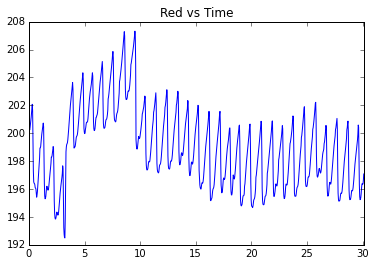

In [13]:
#Graphing the red values
redSeries = pd.Series(redValues, index = ppgTimes)
%matplotlib inline
redSeries.plot(title = "Red vs Time")

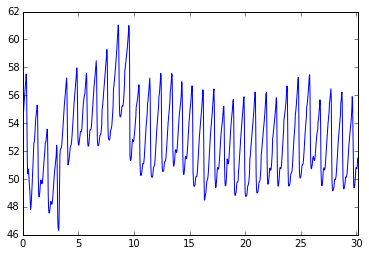

In [14]:
#Graphing the green values
greenSeries = pd.Series(greenValues, index = ppgTimes)
greenSeries.plot()

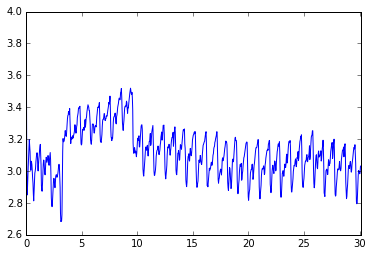

In [15]:
#Graphing the blue values
blueSeries = pd.Series(blueValues, index = ppgTimes)
blueSeries.plot()

In [16]:
#The second sample:
video2 = cv2.VideoCapture("PPGsample2.mp4")
ret, frame = video.read()
width = int(video.get(3))
height = int(video.get(4))
fps = video.get(5)
length = int(video.get(7))/fps
print 'Video Width: ', width, 'px'
print 'Video Height: ', height, 'px'
print 'Video FPS: ', fps, 'frames per second'
print 'Video Length: ', length, 's'
#Processing the video takes a lot of time,
#so this is going to be from a text file of a pre-processed video
redValues, greenValues, blueValues = readFromFile('color-values-PPG2.txt')
ppg2Times = constructTimeList(len(redValues), 1/fps)


Video Width:  1920 px
Video Height:  1080 px
Video FPS:  30.323427803 frames per second
Video Length:  30.1746888889 s


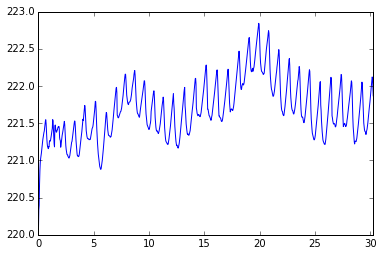

In [17]:
#Red values for second sample
redSeries = pd.Series(redValues,ppg2Times)
redSeries.plot()

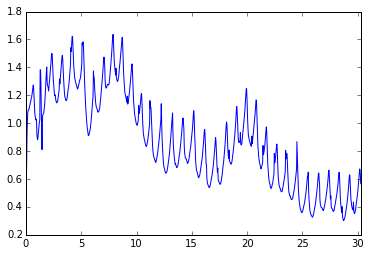

In [18]:
#Green values for second sample
greenSeries = pd.Series(greenValues,ppg2Times)
greenSeries.plot()

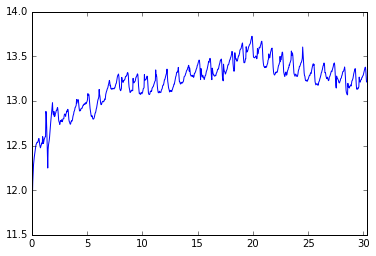

In [19]:
#Blue values for second sample
blueSeries = pd.Series(blueValues,ppg2Times)
blueSeries.plot()